In [1]:
from cloudnetpy.instruments import mira2nc
uuid = mira2nc('data/20230729_0000.mmclx', 'data_processed/radar.nc', {'name': 'Munich'})
from cloudnetpy.instruments import ceilo2nc
uuid = ceilo2nc('data/CHM15kxLMU_20230729.nc', 'data_processed/lidar.nc', {'name': 'Munich', 'altitude': 538})
from cloudnetpy.instruments import hatpro2nc
uuid, valid_files = hatpro2nc('data', 'data_processed/mwr.nc', {'name': 'Munich', 'altitude': 538}, date='2023-07-29')

In [2]:
import xarray as xr
ds_radar = xr.open_dataset('data_processed/radar.nc', decode_times=False)
ds_mwr = xr.open_dataset('data_processed/mwr.nc', decode_times=False)
ds_lidar = xr.open_dataset('data_processed/lidar.nc', decode_times=False)
ds_model = xr.open_dataset('data/20230729_munich_ecmwf.nc', decode_times=False)

In [3]:
ds_model

<xarray.Dataset> Size: 484kB
Dimensions:                       (time: 25, level: 137, flux_level: 138,
                                   frequency: 2)
Coordinates:
  * time                          (time) float32 100B 0.0 1.0 2.0 ... 23.0 24.0
  * level                         (level) int16 274B 137 136 135 134 ... 4 3 2 1
  * flux_level                    (flux_level) int16 276B 138 137 136 ... 3 2 1
  * frequency                     (frequency) float32 8B 35.0 94.0
Data variables: (12/59)
    latitude                      float32 4B ...
    longitude                     float32 4B ...
    horizontal_resolution         float32 4B ...
    forecast_time                 (time) float32 100B ...
    pressure                      (time, level) float32 14kB ...
    uwind                         (time, level) float32 14kB ...
    ...                            ...
    gas_atten                     (frequency, time, level) float32 27kB ...
    specific_gas_atten            (frequency, time, level) float32 27kB ...
    specific_saturated_gas_atten  (frequency, time, level) float32 27kB ...
    specific_dry_gas_atten        (frequency, time, level) float32 27kB ...
    K2                            (frequency, time, level) float32 27kB ...
    specific_liquid_atten         (frequency, time, level) float32 27kB ...
Attributes: (12/13)
    Conventions:          CF-1.8
    title:                ECMWF IFS single-site output over Munich
    location:             Munich
    source:               ECMWF Integrated Forecast System (IFS)
    institution:          European Centre for Medium-Range Weather Forecasting
    initialization_time:  2023-07-29 00:00:00 +00:00
    ...                   ...
    cloudnet_file_type:   model
    year:                 2023
    month:                07
    day:                  29
    history:              2023-08-01 19:08:53 +00:00 - model metadata harmoni...
    pid:                  https://hdl.handle.net/21.12132/1.856b5a84155b427d

In [4]:
ds_mwr_HALO = xr.open_dataset('/home/josh/data/unified_microwave.nc')
ds_mwr_HALO

<xarray.Dataset> Size: 338MB
Dimensions:             (uniRadiometer_freq: 25, time: 514779)
Coordinates:
  * uniRadiometer_freq  (uniRadiometer_freq) float64 200B 22.24 23.04 ... 190.8
  * time                (time) datetime64[ns] 4MB 2022-03-11T13:19:28 ... 202...
Data variables:
    TB                  (time, uniRadiometer_freq) float64 103MB ...
    freq                (time, uniRadiometer_freq) float64 103MB ...
    interpolate_flag    (time, uniRadiometer_freq) float64 103MB ...
    lat                 (time) float64 4MB ...
    lon                 (time) float64 4MB ...
    alt                 (time) float64 4MB ...
    surface_mask        (time) float64 4MB ...
    mask                (time) int64 4MB ...
    grad_ratio_50_37    (time) float64 4MB ...
Attributes:
    contact:               henning.dorff@uni-hamburg.de
    flight_date:           20220311
    flight_number:         RF01
    mission:               HALO_AC3
    comment:               Preliminary data! Uncalibrated Data. Only use for ...
    performed_processing:  Gaps filled. Strong flight manoeuvers removed. Rad...

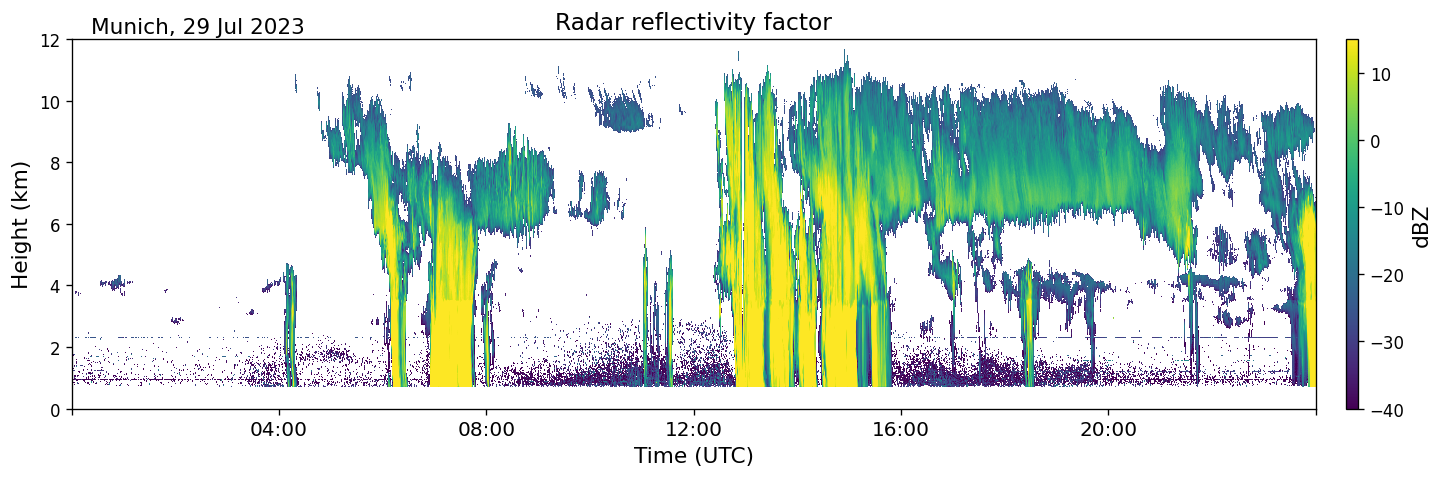

/home/josh/y/envs/cloudnet/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:820: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


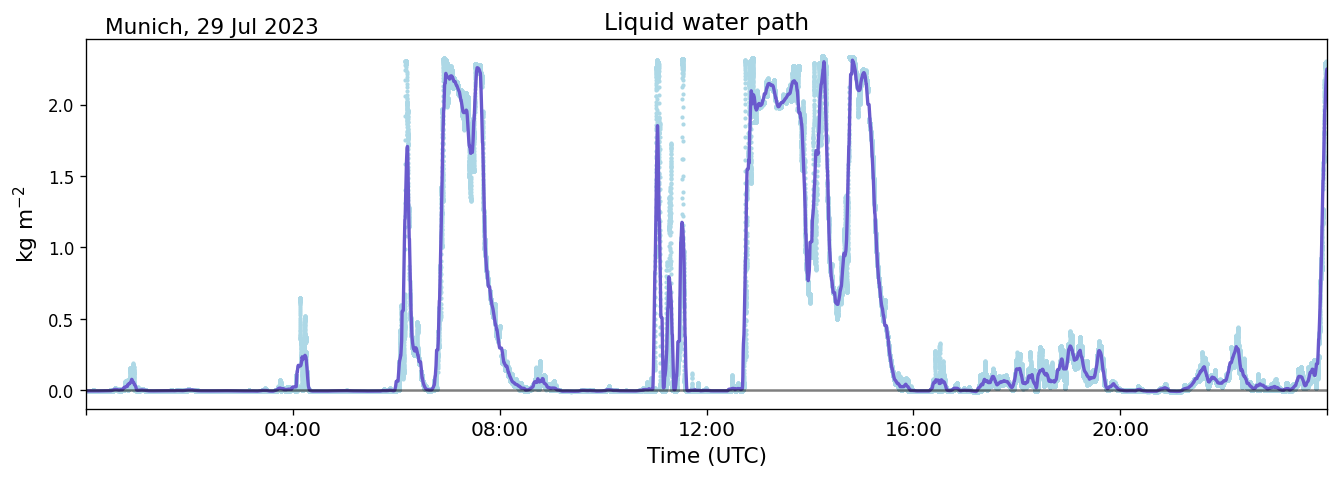

/home/josh/y/envs/cloudnet/lib/python3.12/site-packages/matplotlib/colors.py:744: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


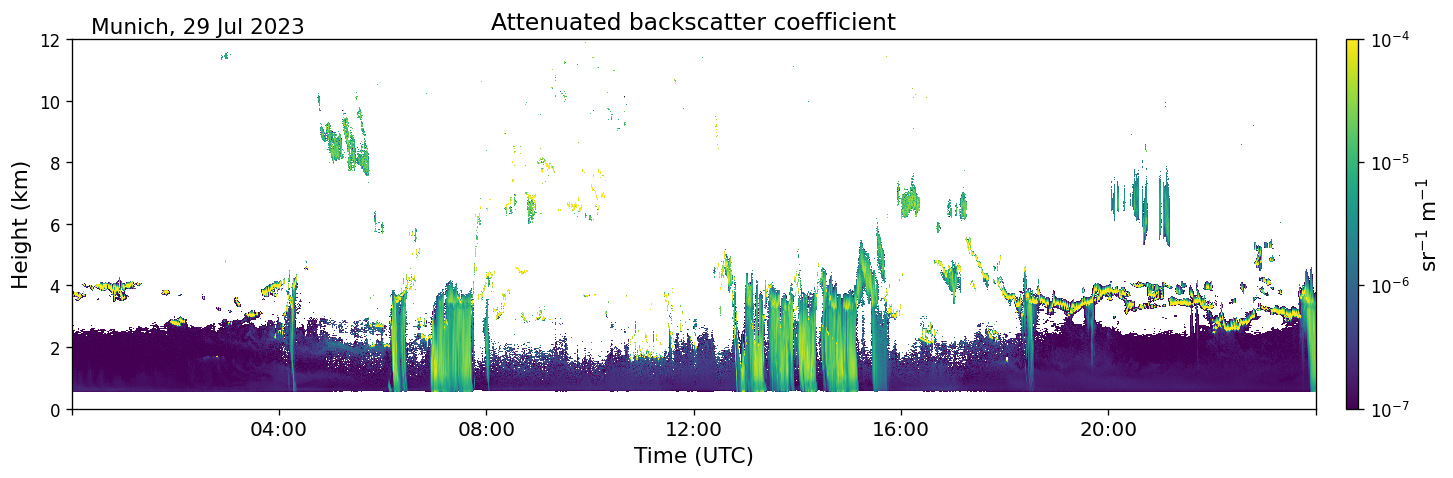

In [5]:
from cloudnetpy.plotting import generate_figure
from cloudnetpy.products import generate_lwc

generate_figure('data_processed/radar.nc',  ['Zh'])
generate_figure('data_processed/mwr.nc', ['lwp'])
generate_figure('data_processed/lidar.nc', ['beta'])


In [6]:
ds_mwr.lwp.attrs

{'units': 'kg m-2',
 'long_name': 'Liquid water path',
 'standard_name': 'atmosphere_cloud_liquid_water_content'}

In [7]:
import numpy as np
ds_mwr_HALO = xr.open_dataset('/home/josh/data/unified_microwave_LWP.nc')
ds_radar_HALO = xr.open_dataset('/home/josh/data/unified_radar.nc')
ds_lidar_HALO = xr.open_dataset('/home/josh/data/unified_bsrgl.nc')

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
# ds_radar_HALO = xr.open_dataset('/home/josh/data/unified_radar.nc')
# ds_radar_HALO_to_cloudnet = ds_radar_HALO.sel(time='2022-04-10')#.interp(time=pd.date_range('2022-04-10T00:00:00', '2022-04-10T23:59:59', freq='5s'))    

# ds_radar_HALO_to_cloudnet.attrs = ds_radar.attrs
# ds_radar_HALO_to_cloudnet.attrs['year'] = '2022'
# ds_radar_HALO_to_cloudnet.attrs['month'] = '04'
# ds_radar_HALO_to_cloudnet.attrs['day'] = '10'

# ds_radar_HALO_to_cloudnet = ds_radar_HALO_to_cloudnet.rename({
#     'height' : 'range',
#     'dBZg' : 'Zh',
#     'VELg' : 'v',
#     'RMSg' : 'width',
#     'LDRg' : 'ldr',
#     'SNRg' : 'SNR',
# }
# )

# for var in ds_radar.data_vars:
#     if var in list(ds_radar_HALO_to_cloudnet.data_vars):
#         for attr in ds_radar[var].attrs.keys():
#             ds_radar_HALO_to_cloudnet[var].attrs[attr] = ds_radar[var].attrs[attr]

# for var in ds_radar_HALO_to_cloudnet.data_vars:
#     if var not in list(ds_radar.data_vars):
#         ds_radar_HALO_to_cloudnet = ds_radar_HALO_to_cloudnet.drop_vars(var)

# ds_radar_HALO_to_cloudnet['time'].attrs = ds_radar['time'].attrs
# ds_radar_HALO_to_cloudnet['range'].attrs = ds_radar['range'].attrs
# ds_radar_HALO_to_cloudnet['rg0'] = 150
# ds_radar_HALO_to_cloudnet['radar_frequency'] = 94e9
# ds_radar_HALO_to_cloudnet['frac_hours'] = ds_radar_HALO_to_cloudnet['time'].dt.hour + ds_radar_HALO_to_cloudnet['time'].dt.minute/60 + ds_radar_HALO_to_cloudnet['time'].dt.second/3600
# ds_radar_HALO_to_cloudnet['time'] = ds_radar_HALO_to_cloudnet['frac_hours']
# ds_radar_HALO_to_cloudnet['date'] = ds_radar_HALO_to_cloudnet.attrs['year'] + '-' + ds_radar_HALO_to_cloudnet.attrs['month'] + '-' + ds_radar_HALO_to_cloudnet.attrs['day']

# ds_radar_HALO_to_cloudnet['time'].attrs['units'] = f'hours since {ds_radar_HALO_to_cloudnet.date.values} 00:00:00 +00:00'
# ds_radar_HALO_to_cloudnet['time'].attrs['long_name'] = 'Time UTC'
# ds_radar_HALO_to_cloudnet['time'].attrs['standard_name'] = 'time'
# ds_radar_HALO_to_cloudnet['time'].attrs['axis'] = 'T'
# ds_radar_HALO_to_cloudnet['time'].attrs['calendar'] = 'standard'
# ds_radar_HALO_to_cloudnet['time'] = ds_radar_HALO_to_cloudnet['time'].astype(np.float32)

# ds_radar_HALO_to_cloudnet['zenith_angle'] = (['time'], np.zeros(len(ds_radar_HALO_to_cloudnet['time'])))
# ds_radar_HALO_to_cloudnet['latitude'] = (['time'], np.zeros(len(ds_radar_HALO_to_cloudnet['time'])))

# ds_radar_HALO_to_cloudnet.to_netcdf('data_HALO/radar_HALO.nc', mode='w', format='NETCDF4_CLASSIC', engine='netcdf4')   

# generate_figure('data_HALO/radar_HALO.nc', ['Zh'])

In [10]:
list(ds_lidar.data_vars), list(ds_lidar_HALO.data_vars)

(['calibration_factor',
  'beta_raw',
  'zenith_angle',
  'beta',
  'beta_smooth',
  'height',
  'wavelength',
  'altitude'],
 ['backscatter_ratio',
  'flags',
  'error',
  'vertical_resolution',
  'flight_altitude',
  'off_nadir_angle',
  'horizontal_resolution',
  'airdensity',
  'airtemperature'])

In [11]:
ds_lidar.calibration_factor.values

array(3.e-12, dtype=float32)

In [12]:
ds_lidar_HALO.error

<xarray.DataArray 'error' (time: 2700300, altitude: 250)> Size: 3GB
[675075000 values with dtype=float32]
Coordinates:
  * altitude  (altitude) float64 2kB 0.0 40.16 80.32 ... 9.92e+03 9.96e+03 1e+04
  * time      (time) datetime64[ns] 22MB 2022-03-12T08:50:00 ... 2022-04-12T1...
Attributes:
    units:        
    long_name:    Error of backscatter ratio
    description:  Statistical error of the main data field as 1-sigma deviati...

In [13]:
ds_lidar_HALO.error.sel(time='2022-04-10').quantile([0.01, 0.99])

<xarray.DataArray 'error' (quantile: 2)> Size: 16B
array([1.25849624e-02, 5.31005171e+02])
Coordinates:
  * quantile  (quantile) float64 16B 0.01 0.99

In [16]:
import uuid
def airborne_data_to_cloudnet(ds, date, output_file, type='radar'):
    ds = ds.sel(time=date)
    ds.attrs['year'] = date[:4]
    ds.attrs['month'] = date[5:7]
    ds.attrs['day'] = date[8:10]

    var_mapping = {
        'height' : 'range',
        'dBZg' : 'Zh',
        'VELg' : 'v',
        'RMSg' : 'width',
        'LDRg' : 'ldr',
        'SNRg' : 'SNR',
        'LWP' : 'lwp',
    }

    if type == 'radar':
        for var in ds.data_vars:
            if var in list(var_mapping.keys()):
                ds = ds.rename({var: var_mapping[var]})
            else:
                ds = ds.drop_vars([var])
            
        ds = ds.rename({'height' : 'range'})
        ds['range'].attrs = {'units': 'm',
        'long_name': 'Range from instrument',
        'comment': 'Distance from instrument to centre of each range bin.',
        'axis': 'Z'}
        ds.attrs.update({'Conventions': 'CF-1.8',
        'cloudnetpy_version': '1.65.8',
        'file_uuid': f'{str(uuid.uuid1())}',
        'cloudnet_file_type': 'radar',
        'title': 'MIRA-35 cloud radar from Munich',
        'year': '2022',
        'month': '04',
        'day': '10',
        'location': 'Munich',
        'history': '2024-09-07 13:36:24 +00:00 - radar file created',
        'source': 'METEK MIRA-35',
        'references': 'https://doi.org/10.21105/joss.02123'})
        ds['rg0']  = 150
        ds['radar_frequency'] = 94e9

    
    if type == 'mwr':

        for var in ds.data_vars:
            if var in list(var_mapping.keys()):
                ds = ds.rename({var: var_mapping[var]})
            else:
                ds = ds.drop_vars([var])


        ds.attrs.update({'Conventions': 'CF-1.8',
        'cloudnetpy_version': '1.65.8',
        'file_uuid': '59d80f6a-7eb9-48ac-a23e-b25e299c473d',
        'cloudnet_file_type': 'mwr',
        'title': 'HATPRO microwave radiometer from Munich',
        'location': 'Munich',
        'history': '2024-09-07 13:36:40 +00:00 - mwr file created',
        'source': 'RPG-Radiometer Physics HATPRO',
        'references': 'https://doi.org/10.21105/joss.02123'}
        )

        ds['lwp'].attrs['units'] = 'kg m-2'
        ds['lwp'].attrs['long_name'] = 'Liquid water path'
        ds['lwp'].attrs['standard_name'] = 'atmosphere_cloud_liquid_water_content'
        ds = ds.drop_dims('uniRadiometer_freq')

            
    ds['frac_hours'] = ds['time'].dt.hour + ds['time'].dt.minute/60 + ds['time'].dt.second/3600
    ds['time'] = ds['frac_hours']
    ds['date'] = date
    ds['time'].attrs['units'] = f'hours since {ds.date.values} 00:00:00 +00:00'
    ds['time'].attrs['long_name'] = 'Time UTC'
    ds['time'].attrs['standard_name'] = 'time'
    ds['time'].attrs['axis'] = 'T'
    ds['time'].attrs['calendar'] = 'standard'
    ds['time'] = ds['time'].astype(np.float32)
    ds['zenith_angle'] = (['time'], np.zeros(len(ds['time'])))

    ds.to_netcdf(output_file, mode='w', format='NETCDF4_CLASSIC', engine='netcdf4')
    return ds

d = airborne_data_to_cloudnet(ds_radar_HALO, '2022-04-10', 'data_HALO/radar_HALO.nc')

#d = airborne_data_to_cloudnet(ds_mwr_HALO, '2022-04-10', 'data_HALO/mwr_HALO.nc', type='mwr')

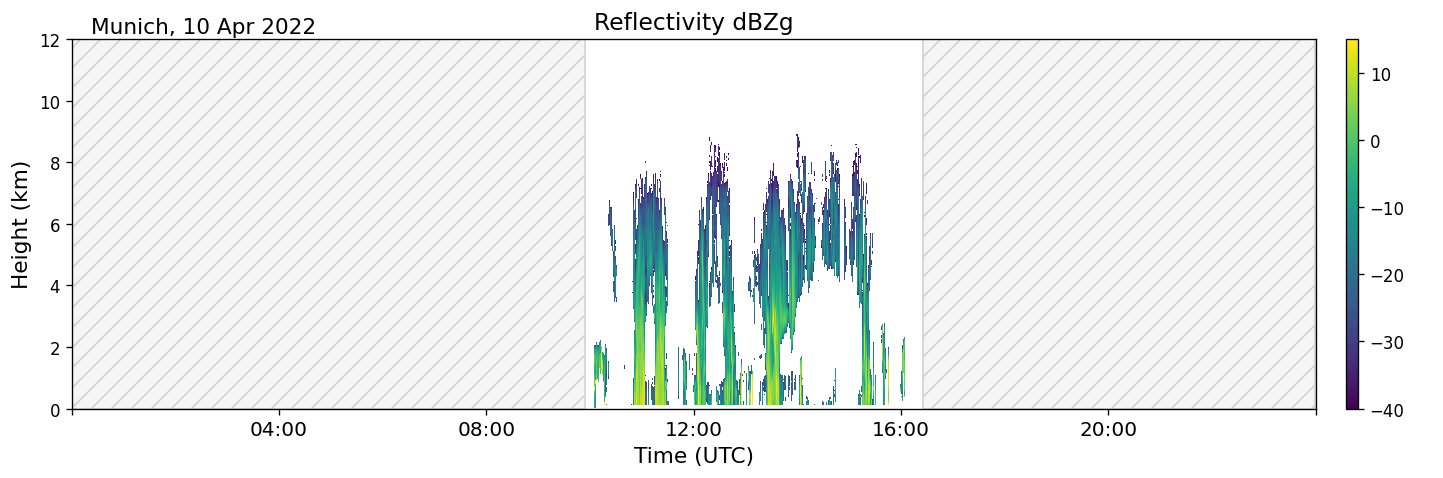

/home/josh/y/envs/cloudnet/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:820: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


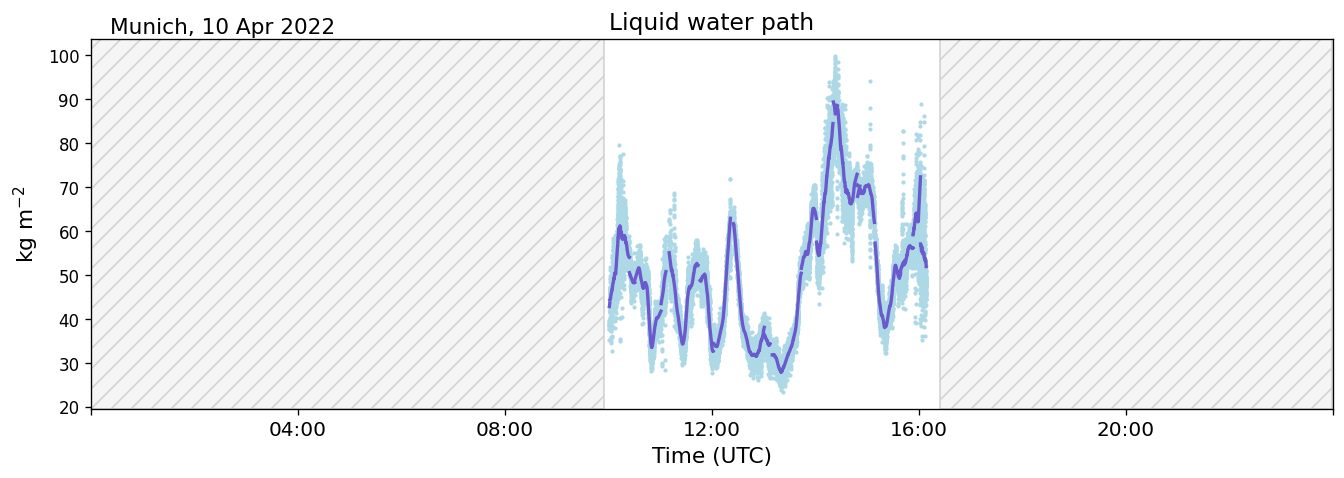

In [17]:
generate_figure('data_HALO/radar_HALO.nc', ['Zh'])
generate_figure('data_HALO/mwr_HALO.nc', ['lwp'])

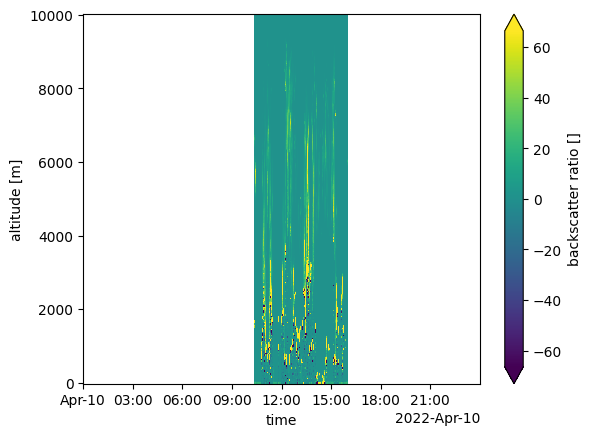

In [22]:
ds_lidar_HALO.sel(time='2022-04-10').backscatter_ratio.plot(x='time', y='altitude', cmap='viridis', robust=True)

In [135]:
from cloudnetpy.categorize import generate_categorize
input_files = {
    'radar': 'data_processed/radar.nc',
    'lidar': 'data_processed/lidar.nc',
    'model': 'data/20230729_munich_ecmwf.nc',
    'mwr': 'data_processed/mwr.nc'
}
uuid = generate_categorize(input_files, 'data_products/categorize.nc')

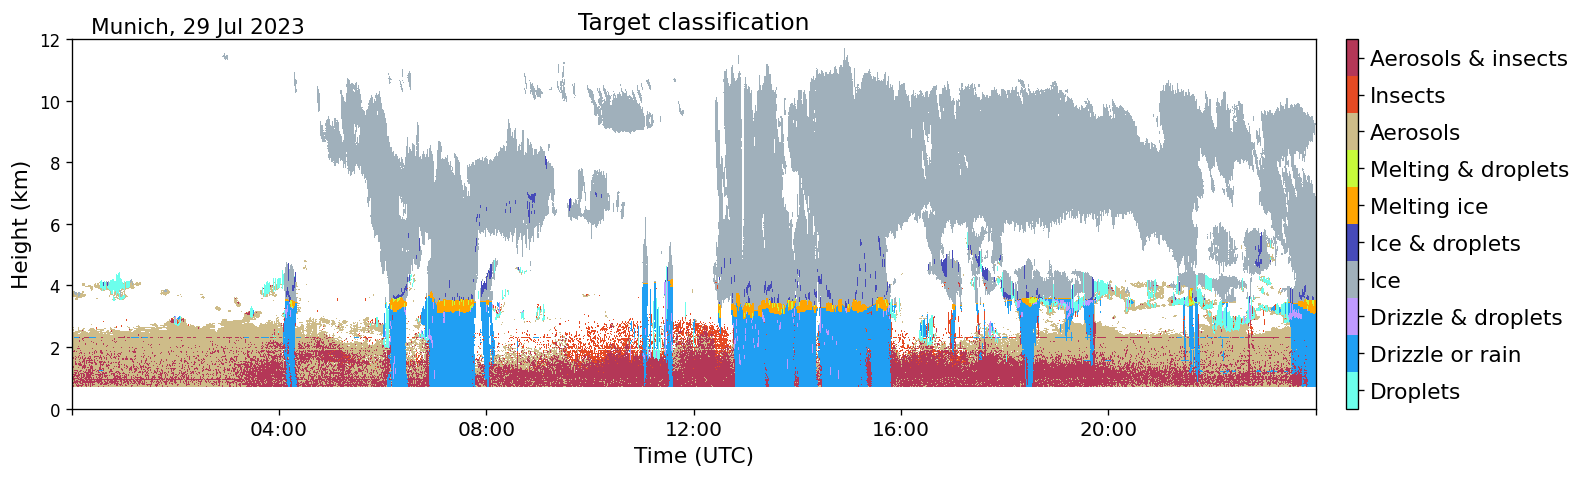

In [139]:

from cloudnetpy.products import generate_classification
uuid = generate_classification('data_products/categorize.nc', 'data_products/classification.nc')
generate_figure('data_products/classification.nc', ['target_classification'])

In [142]:
ds_c = xr.open_dataset('data_products/categorize.nc')
ds_c

<xarray.Dataset> Size: 115MB
Dimensions:             (time: 2880, height: 765, model_time: 25,
                         model_height: 137)
Coordinates:
  * time                (time) datetime64[ns] 23kB 2023-07-29T00:00:15.000000...
  * height              (height) float32 3kB 696.9 728.1 ... 2.449e+04 2.452e+04
  * model_time          (model_time) datetime64[ns] 200B 2023-07-29 ... 2023-...
  * model_height        (model_height) float32 548B 551.2 572.6 ... 7.763e+04
Data variables: (12/31)
    Z                   (time, height) float32 9MB ...
    v                   (time, height) float32 9MB ...
    ldr                 (time, height) float32 9MB ...
    width               (time, height) float32 9MB ...
    v_sigma             (time, height) float32 9MB ...
    nyquist_velocity    (height) float32 3kB ...
    ...                  ...
    pressure            (model_time, model_height) float32 14kB ...
    q                   (model_time, model_height) float32 14kB ...
    uwind               (model_time, model_height) float32 14kB ...
    vwind               (model_time, model_height) float32 14kB ...
    lwp                 (time) float32 12kB ...
    lwp_error           (time) float32 12kB ...
Attributes: (12/13)
    Conventions:         CF-1.8
    cloudnetpy_version:  1.65.8
    file_uuid:           bc4d44dd-5496-49ef-afaf-e3b435e22ab2
    cloudnet_file_type:  categorize
    year:                2023
    month:               07
    ...                  ...
    location:            Munich
    title:               Cloud categorization products from Munich
    source_file_uuids:   fd613c92-6e02-4dc0-bd99-ab5c9af533b3, 59d80f6a-7eb9-...
    references:          https://doi.org/10.21105/joss.02123, https://doi.org...
    source:              METEK MIRA-35\nLufft CHM15kx\nRPG-Radiometer Physics...
    history:             2024-09-07 14:32:43 +00:00 - categorize file created...

In [133]:
from cloudnetpy.categorize import generate_categorize
input_files = {
    'radar': 'data_HALO/data_radar.nc',
    'lidar': 'data_HALO/data_lidar.nc'
}
uuid = generate_categorize(input_files, 'categorize.nc')

NameError: cannot access free variable 'data' where it is not associated with a value in enclosing scope

/home/josh/y/envs/cloudnet/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:820: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


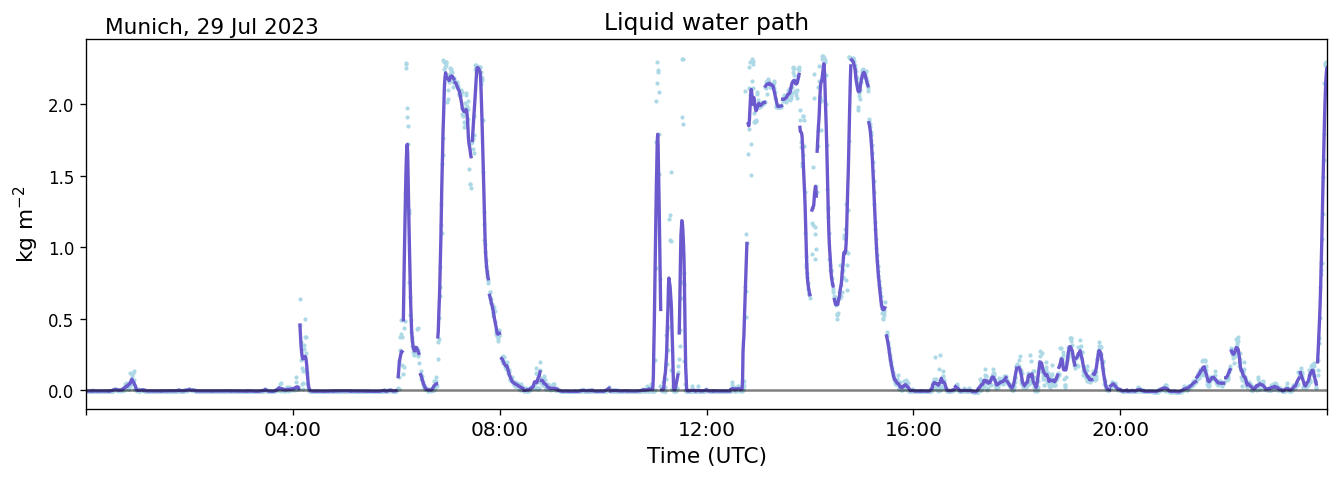

/home/josh/y/envs/cloudnet/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:820: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


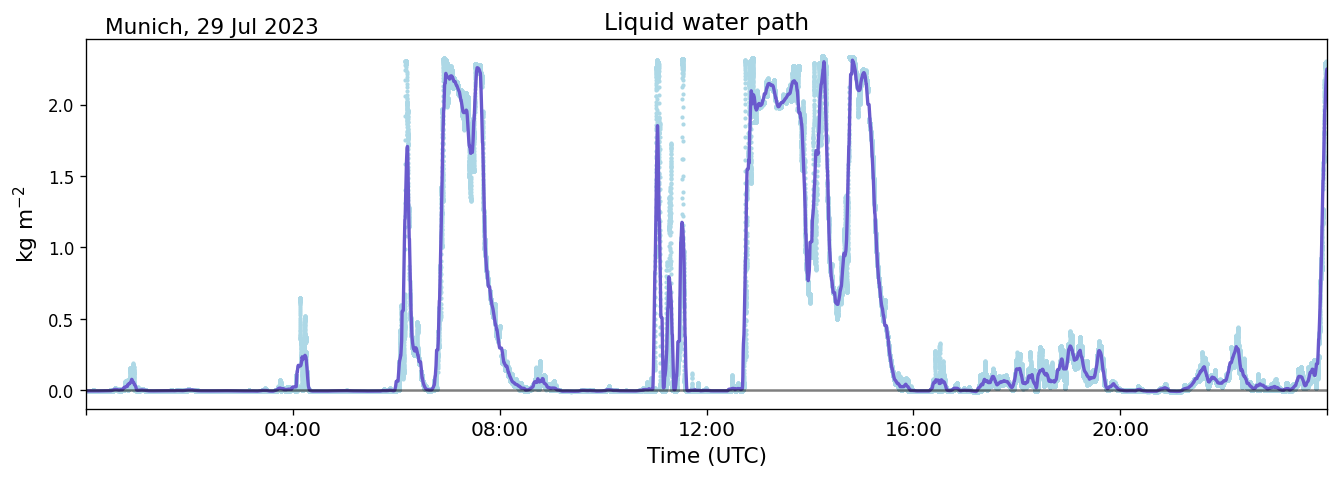

In [149]:
from cloudnetpy.products import generate_iwc, generate_der, generate_lwc

generate_lwc(
    'data_products/categorize.nc', 'data_products/lwp.nc'
)

generate_figure('data_products/lwp.nc', ['lwp'])
generate_figure('data_processed/mwr.nc', ['lwp'])

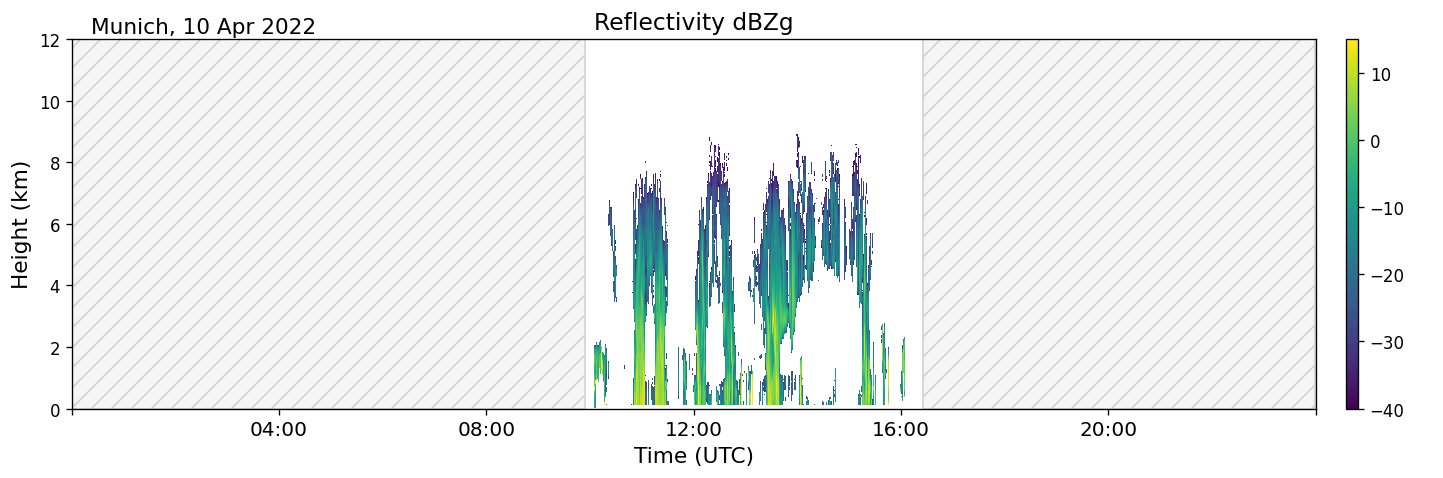

/home/josh/y/envs/cloudnet/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:820: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


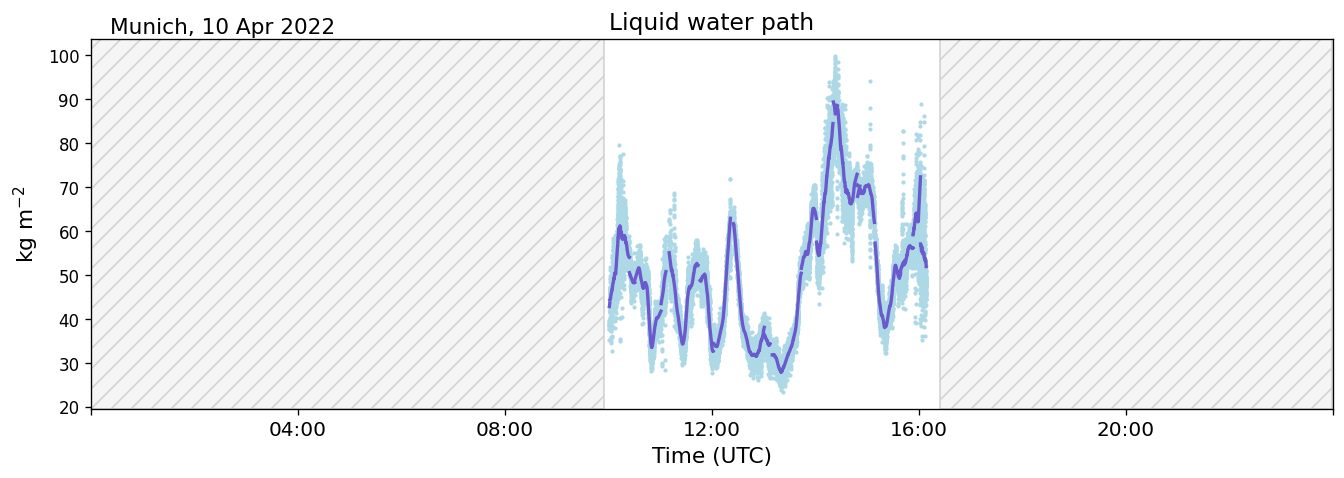

In [106]:
generate_figure('data_HALO/radar_HALO.nc', ['Zh'])
generate_figure('data_HALO/mwr_HALO.nc', ['lwp'])

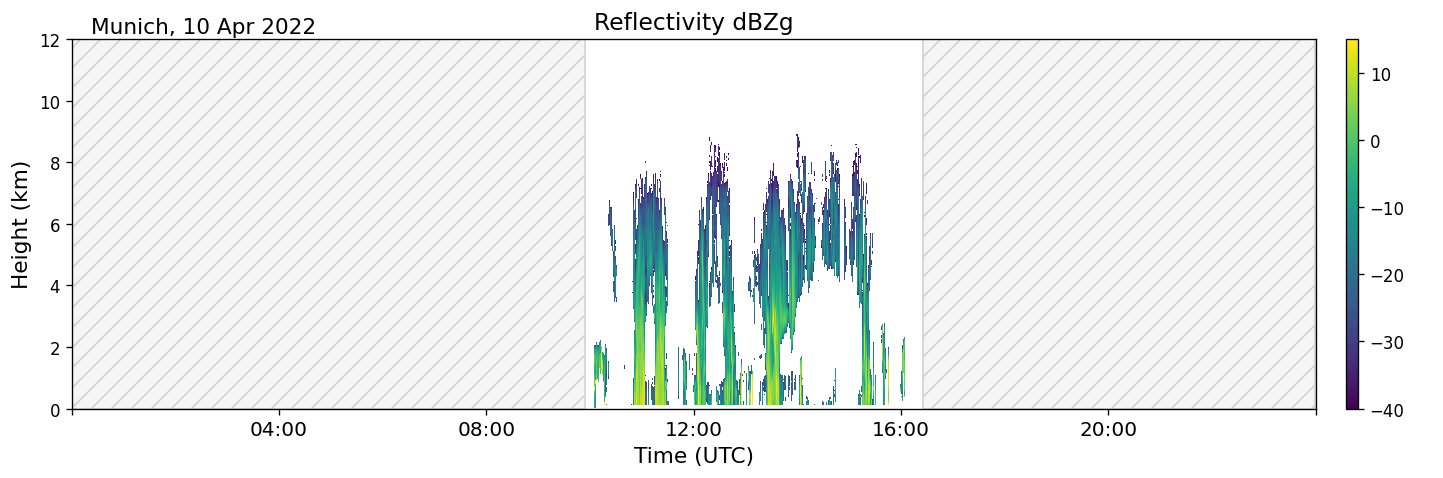